## Taller 4
### Diego Ulises Cruz Cruz
#### 201412142

In [ ]:
%pylab inline
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Excercise 1

$f(x)=exp(-\alpha x^{2})\rightarrow \hat{f}(k)
=\frac{1}{\sqrt{2a}}exp\left (  -\frac{k^{2}}{4\alpha }\right )$

In [2]:
L=20
n=128
x_2=np.linspace(-L/2,L/2,n+1)
x=[]
for i, c in enumerate (x_2):
    x.append(c)
x=np.array(x)
u=np.exp(-x*x)
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)
abs_ut=abs(ut)
abs_utshift=abs(utshift)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


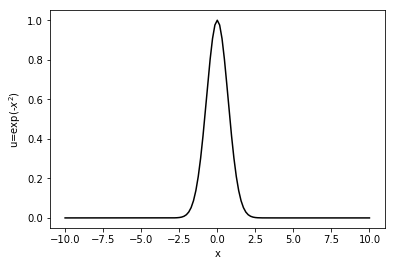

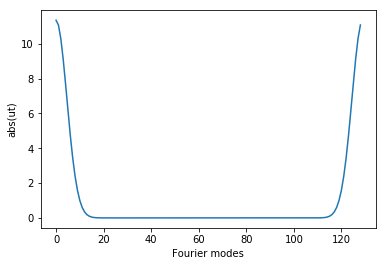

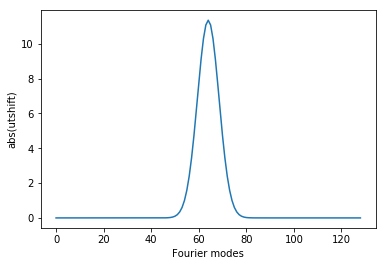

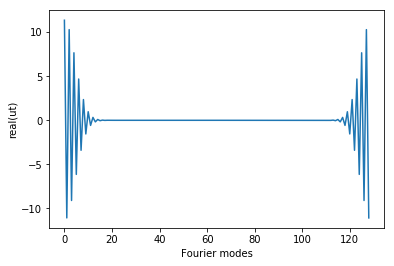

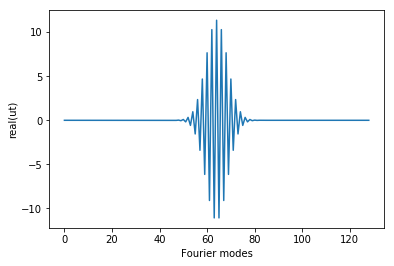

In [3]:
plt.figure()
plt.plot(x,u,'k') 
plt.xlabel('x')
plt.ylabel('u=exp(-$x^{2}$)')

plt.figure()
plt.plot(abs_ut)
plt.xlabel('Fourier modes')
plt.ylabel('abs(ut)')

plt.figure()
plt.plot(abs_utshift)
plt.xlabel('Fourier modes')
plt.ylabel('abs(utshift)')

plt.figure()
plt.plot(ut)
plt.xlabel('Fourier modes')
plt.ylabel('real(ut)')

plt.figure()
plt.plot(utshift)
plt.xlabel('Fourier modes')
plt.ylabel('real(ut)');

### Excercise 2

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


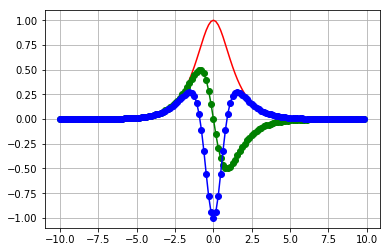

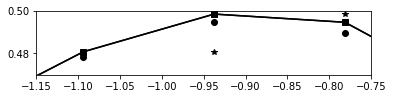

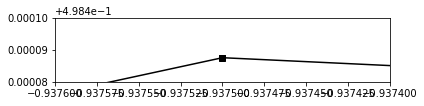

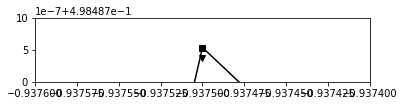

In [4]:
L=20
n=128
x_22=np.linspace(-L/2,L/2,n+1)
x2=[]
for i, c in enumerate (x_22):
    if i<n:
        x2.append(c)
x2=np.array(x2)

dx=x2[2]-x2[1]

u=1/np.cosh(x2)
ut=np.fft.fft(u)
forw=np.linspace(0,n/2-1,n/2)
back=np.linspace(-n/2,-1,n/2)
two=np.append(forw,back)
k=(2*np.pi/L)*two

#FFT calculada de las derivadas

ut1=1j*k*ut
ut2=-k*k*ut
u1=np.fft.ifft(ut1).real
u2=np.fft.ifft(ut2).real
u1exact=-(1/np.cosh(x2))*(np.sinh(x2)/np.cosh(x2))
u2exact=(1/np.cosh(x2))-2*(1/np.cosh(x2))**3

#Cálculo de la primera derivada por diferencias finitas

##2nd-order accurate
ux=[]
ux.append((-3*u[0]+4*u[1]-u[2])/(2*dx))

for j in range(1,n-1):
    ux.append((u[j+1]-u[j-1])/(2*dx))        
ux.append((-3*u[n-1]+4*u[n-2]-u[n-3])/(2*dx) )
ux=np.array(ux)

#4th-order accurate

ux2=[]
ux2.append((-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2.append((-3*u[1]+4*u[2]-u[3])/(2*dx))

for j in range(1,n-2):
    ux2.append((-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx))
ux2.append((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))
ux2=np.array(ux2)

plt.figure()
plt.plot(x2,u,'r',x2,u1,'g',x2,u1exact,'go',x2,u2,'b',x2,u2exact,'bo')
plt.grid(True)

plt.figure()
grid(True)
plt.subplot(3,1,1)
plt.plot(x2,u1exact,'ks-')
plot(x2,u1,'k')
plot(x2,ux,'ko')
plot(x2,ux2,'k*')
xlim(-1.15, -0.75)
ylim(0.47 ,0.5)
show()

plt.subplot(3,1,2)
plot(x2,u1exact,'ks-')
plot(x2,u1,'kv')
plot(x2,ux,'ko')
plot(x2,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.49848, 0.49850)
show()

plt.subplot(3,1,3)
plot(x2,u1exact,'ks-')
plot(x2,u1,'kv')
plot(x2,ux,'ko')
plot(x2,ux2,'k*')
xlim(-0.9376, -0.9374)
ylim(0.498487, 0.498488)
show()

## 12.2 FFT Application: Radar Detection and Filtering

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


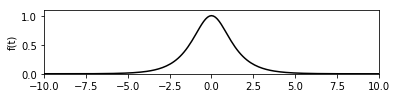

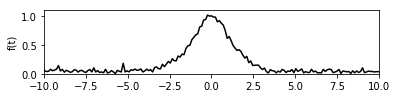

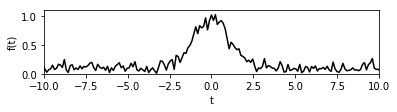

In [5]:
L=30
n=512
t2=linspace(-L,L,n+1)
t=t2[0:n-1]
forw=np.linspace(0,n/2-1,n/2)
back=np.linspace(-n/2,-1,n/2)
two=np.append(forw,back)
k=(2*np.pi/(2*L))*two
u=1/np.cosh(t)

noise=1
ut=np.fft.fft(u)
r1=[]
r2=[]
for i in range(0,n-1):
    r1.append(np.random.uniform(0,3))
    r2.append(1j*random.uniform(0,3))
utn=ut+noise*r1+noise*r2
un =np.fft.ifft(utn)

figure()
subplot(3,1,1)
plot(t,u,'k')
xlim(-10, 10)
ylim(0, 1.1)
ylabel('f(t)')
show()

subplot(3,1,2)
plot(t,abs(un),'k')
xlim(-10, 10)
ylim(0, 1.1)
ylabel('f(t)')
show()

#Incrementando el ruido

noise_2=2
ut=np.fft.fft(u)
r3=[]
r4=[]
for i in range(0,n-1):
    r3.append(np.random.uniform(0,3))
    r4.append(1j*random.uniform(0,3))
    
r3=np.array(r3)
r4=np.array(r4)
utn=ut+r3*noise_2+r4*noise_2
un=np.fft.ifft(utn)

subplot(3,1,3)
plot(t,abs(un),'k')
xlim(-10, 10)
ylim(0, 1.1)
xlabel('t')
ylabel('f(t)')
show()

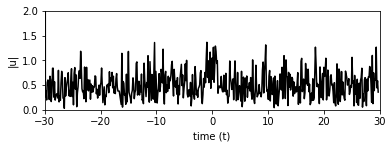

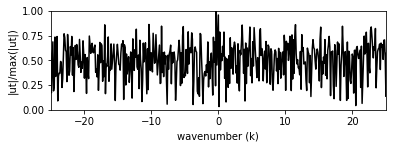

In [6]:
noise=10
ut=np.fft.fft(u)
r5=[]
r6=[]
for i in range(0,n-1):
    r5.append(np.random.uniform(0,3))
    r6.append(1j*random.uniform(0,3))
    
r5=np.array(r3)
r6=np.array(r4)
unt=ut+r5*noise+r6*noise
un =np.fft.ifft(unt)

figure()
subplot(2,1,1)
plot(t,abs(un),'k')
xlim(-30, 30)
ylim(0, 2)
xlabel('time (t)')
ylabel('|u|')
show()

subplot(2,1,2)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
xlim(-25, 25)
ylim(0, 1)
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

$$F (k) = exp(-\tau(k-k_o)^2)$$


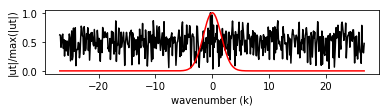

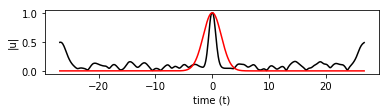

In [7]:
filterr=exp(-0.2*(k[0:len(k)-1]**2))
unft=filterr*unt
unf=np.fft.ifft(unft)

figure

subplot(3,1,1)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(filterr))/max(abs(fftshift(filterr))),'r')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

subplot(3,1,3)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unf))/max(abs(fftshift(unf))),'k')
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(filterr))/max(abs(fftshift(filterr))),'r')
xlabel('time (t)')
ylabel('|u|')
show()


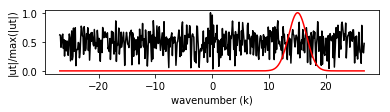

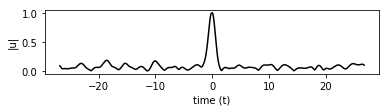

In [8]:
filterr=exp(-0.2*((k[0:len(k)-1]-15)**2))
unft=filterr*unt
unf=np.fft.ifft(unft)
figure

subplot(3,1,1)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unt))/max(abs(fftshift(unt))),'k')
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(filterr))/max(abs(fftshift(filterr))),'r')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
show()

subplot(3,1,3)
plot(fft.fftshift(k[0:len(k)-1]),abs(fftshift(unf))/max(abs(fftshift(unf))),'k')
xlabel('time (t)')
ylabel('|u|')
show()

## 12.3 FFT Application: Radar Detection and Averaging

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:34: ComplexWarning: Casting complex values to real discards the imaginary part


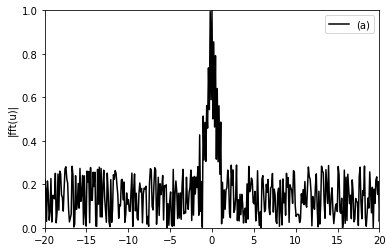

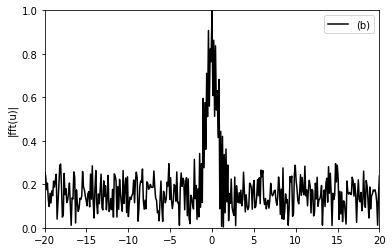

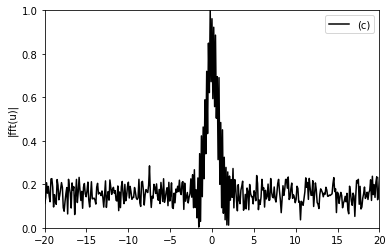

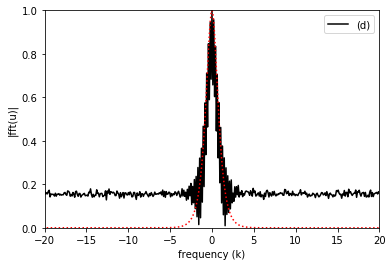

In [9]:
L=30
n=512

t2=linspace(-L,L,n+1)
t=t2[0:n-1]
forw=np.linspace(0,n/2-1,n/2)
back=np.linspace(-n/2,-1,n/2-1)
two=np.append(forw,back)
k=(2*np.pi/(2*L))*two
ks=np.fft.fftshift(k)
noise=10
labels=np.array(['(a)','(b)','(c)','(d)'])
realize=np.array([1,2,5,100])


for jj,v in enumerate (realize):
    u=1/np.cosh(t)
    ave=np.zeros((1,n-1))
    ut=np.fft.fft(u)
    utn=np.zeros((v,n-1))
    dat=np.zeros((v,n-1))
    un=np.zeros((v,n-1))
    for j in range(0,v):
        rand1=[]
        rand2=[]
        for r in range (0,n-1):
            rand1.append(np.random.rand())    
            rand2.append(np.random.rand()) 
        rand1=np.asarray(rand1)
        rand2=np.asarray(rand2)
        utn[j,:]= ut+noise*(rand1+(1j*rand2))
        ave=ave+utn[j,:]
        dat[j,:]= abs(np.fft.fftshift(utn[j,:]))/(max(abs(utn[j,:])))     
        un[j,:]=np.fft.ifft(utn[j,:])
    ave=abs(fftshift(ave))/v

    plt.plot(ks,ave[0,:]/max(ave[0,:]),'k',label=labels[jj])     
    xlim(-20, 20)
    ylim(0, 1)
    ylabel('|fft(u)|')
    if jj==3:
        plot(ks,abs(np.fft.fftshift(ut))/max(abs(ut)),'r:')
        xlabel('frequency (k)')
    legend()
    show()

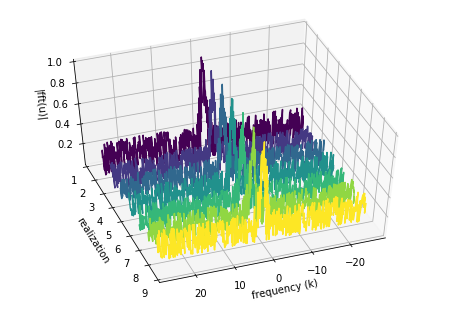

In [10]:
fig=plt.figure()
ax=Axes3D(fig)
y=np.array([1,2,3,4,5,6,7,8,9])
X,Y=np.meshgrid(ks,y)
p=ax.contour(X,Y, dat[0:9],zdir='y')
plt.xlabel('frequency (k)')
plt.ylabel('realization')
plt.xlim(-28,28)
plt.ylim(1,9)
ax.set_zlabel('|fft(u)|')
ax.view_init(50,70)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1714: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[which_pt] = np.array(ps2[i1]) - np.array(ps2[i2])
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1715: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[which_pt] = np.array(ps2[i2]) - np.array(ps2[i3])
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:33: ComplexWarning: Casting complex values to real discards the imag

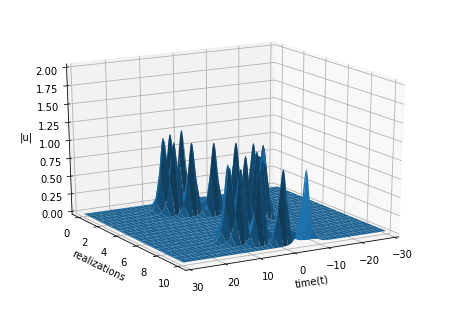

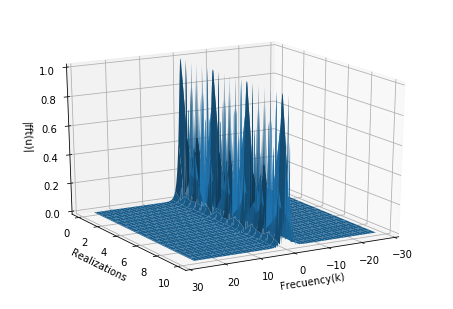

In [12]:
slice=linspace(0,10,10/0.5)
[T,S]=meshgrid(t,slice)
[K,S]=meshgrid(k,slice)
U=1/(np.cosh(T-10*np.sin(S))) *exp(1j*0*T)
n_1=len(slice)

fig=plt.figure()
subplot(2,1,1)
ax=Axes3D(fig)
ax.plot_surface(T,S,U)
xlabel('time(t)')
ylabel('realizations')
ax.set_zlabel('|u|')
xlim([-30,30])
ax.set_zlim(0,2)
ax.view_init( 20,60)

Ut=np.zeros((n_1,n-1))
Kp=np.zeros((n_1,n-1))
Utp=np.zeros((n_1,n-1))
Utn=np.zeros((n_1,n-1))
Utnp=np.zeros((n_1,n-1))
Un=np.zeros((n_1,n-1))

for v in range(0,len(slice)):
    rand1=[]
    rand2=[]
    for i in range(0,n-1):
        rand1.append(random.randn())
        rand2.append(random.randn())
    rand1=np.array(rand1)
    rand2=np.array(rand2)    
    Ut[v,:]=np.fft.fft(U[v,:])
    Kp[v,:]=np.fft.fftshift(K[v,:])
    Utp[v,:]=np.fft.fftshift(Ut[v,:])
    Utn[v,:]=Ut[v,:]+noise*(rand1+(rand2*1j))
    Utnp[v,:]=np.fft.fftshift(Utn[v,:])/max(abs(Utn[v,:]))
    Un[v,:]=np.fft.ifft(Utn[v,:])
    
fig =plt.figure()
subplot(2,1,2)
ax=Axes3D(fig)

ax.plot_surface(Kp,S,abs(Utp)/max(abs(Utp[0,:])))
xlabel('time(t)')
ylabel('realizations')
ax.set_zlabel('|fft(u)|')
xlim([-28,28])
ax.set_zlim(0,1)
xlabel('Frecuency(k)')
ylabel('Realizations')
ax.view_init( 20,60)

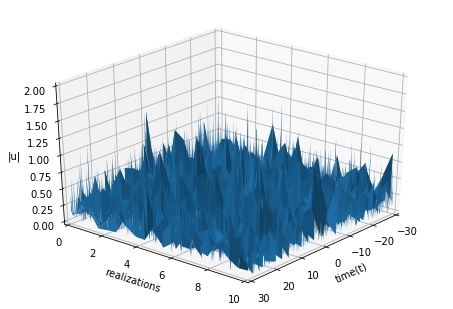

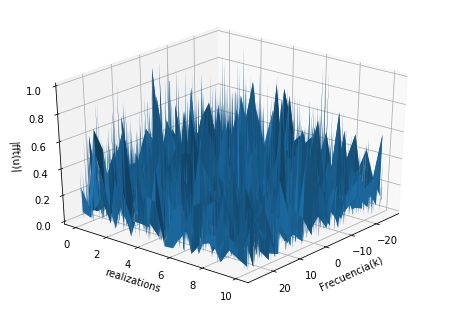

In [15]:
fig=plt.figure()
subplot(2,1,1)
ax=Axes3D(fig)
ax.plot_surface(T,S,abs(Un))
xlabel('time(t)')
ylabel('realizations')
xlim(-30,30)
ylim(0,10)
ax.set_zlabel('|u|')
ax.view_init(30,40)
ax.set_zlim(0,2)

fig =figure()
subplot(2,1,2)
ax=Axes3D(fig)

ax.plot_surface(Kp,S,abs(Utnp))
xlabel('Frecuencia(k)')
ylabel('realizations')
ax.set_zlabel('|fft(u)|')
xlim(-28,28)
ax.view_init(30,40)
ax.set_zlim(0,1)
show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:18: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


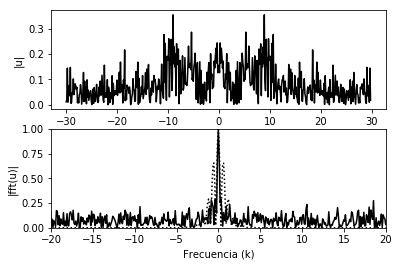

In [19]:
fig=plt.figure()
Uave=np.zeros((1,n-1))    
Utave=np.zeros((1,n-1))
for j in range(0,len(slice)):
    Uave=Uave+Un[j,:]
    Utave=Utave+Utn[j,:]
    
Uave=Uave/len(slice)
Utave=np.fft.fftshift(Utave)/len(slice)

subplot(2,1,1)
plot(t,abs(Uave[0,:]),'k')
xlabel('time (t)')
ylabel('|u|')
 
subplot(2,1,2)
plot(ks,abs(Utave[0,:])/max(abs(Utave[0,:])),'k')
hold(True)
plot(ks,abs(np.fft.fftshift(Ut[1,:]))/max(abs(Ut[1,:])),'k:')
xlim(-20,20)
ylim(0,1)
xlabel('Frecuencia (k)')
ylabel('|fft(u)|')
show()